In [22]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

# Load the dataset
file_path = "car_price_dataset.csv"  # Change if needed
df = pd.read_csv(file_path)

# One-Hot Encode categorical columns
categorical_columns = ["Brand", "Model", "Fuel_Type", "Transmission"]
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Define numerical columns to normalize
numerical_columns = ["Year", "Engine_Size", "Mileage", "Doors", "Owner_Count", "Price"]

# Initialize MinMaxScaler and normalize numerical features
scaler = MinMaxScaler()
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

# Display first few rows
print(df_encoded.head())


       Year  Engine_Size   Mileage  ...  Transmission_Automatic  Transmission_Manual  Transmission_Semi-Automatic
0  0.869565         0.80  0.966648  ...                   False                 True                        False
1  0.521739         0.25  0.017775  ...                    True                False                        False
2  0.869565         0.80  0.771584  ...                    True                False                        False
3  1.000000         0.25  0.536626  ...                   False                 True                        False
4  0.130435         0.40  0.955558  ...                   False                False                         True

[5 rows x 53 columns]


C:\Users\gagan_mdfuudn\AppData\Local\Temp\ipykernel_196384\77511955.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["Brand"], order=df["Brand"].value_counts().index, palette="viridis")


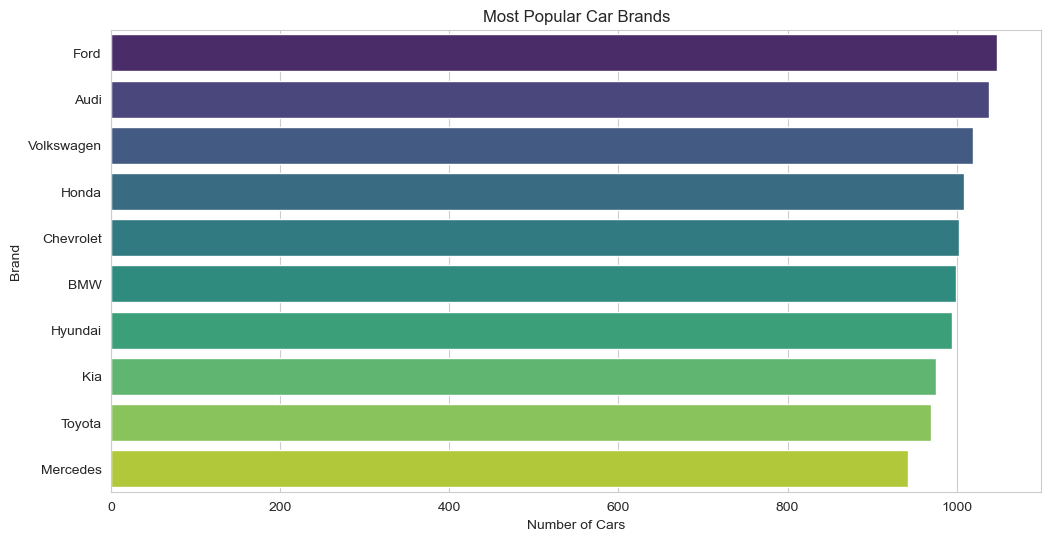

In [23]:
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.countplot(y=df["Brand"], order=df["Brand"].value_counts().index, palette="viridis")
plt.title("Most Popular Car Brands")
plt.xlabel("Number of Cars")
plt.ylabel("Brand")
plt.show()


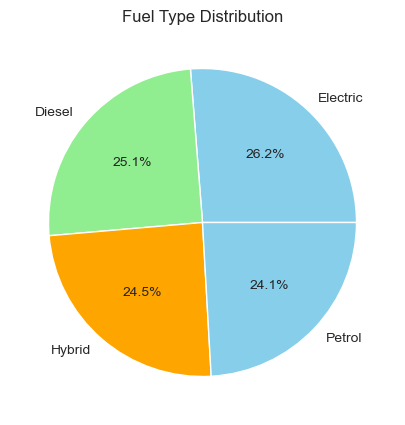

In [24]:
plt.figure(figsize=(8, 5))
df["Fuel_Type"].value_counts().plot.pie(autopct="%1.1f%%", colors=["skyblue", "lightgreen", "orange"])
plt.title("Fuel Type Distribution")
plt.ylabel("")  # Hide y-label
plt.show()



In [25]:
from sklearn.metrics.pairwise import cosine_similarity

# Drop unnecessary columns (if needed)
# Keep only relevant features for similarity calculation
features_for_similarity = df_encoded.drop(columns=["Price"])  # Exclude Price if not needed

# Compute similarity matrix
similarity_matrix = cosine_similarity(features_for_similarity)

# Display similarity matrix shape
print("Similarity Matrix Shape:", similarity_matrix.shape)


Similarity Matrix Shape: (10000, 10000)


In [32]:
import numpy as np

def recommend_cars(user_preferences, df_encoded, similarity_matrix, top_n=5):
    """
    Recommend cars based on user preferences using cosine similarity.
    
    user_preferences: Dictionary with user input values
    df_encoded: Preprocessed dataset
    similarity_matrix: Computed similarity matrix
    top_n: Number of recommendations to return
    """
    
    # Convert user preferences into a DataFrame row
    user_df = pd.DataFrame([user_preferences])
    
    # Normalize numerical values using the same MinMaxScaler
    numerical_columns = ["Year", "Engine_Size", "Mileage", "Doors", "Owner_Count", "Price"]
    user_df[numerical_columns] = scaler.transform(user_df[numerical_columns])
    
    # One-Hot Encode categorical inputs (aligning columns with df_encoded)
    user_df = pd.get_dummies(user_df)
    
    # Ensure the user_df has the same columns as df_encoded (fill missing with 0)
    user_df = user_df.reindex(columns=df_encoded.columns, fill_value=0)

    # Compute similarity scores between user input and all cars
    similarity_scores = cosine_similarity(user_df, df_encoded)[0]
    
    # Get top N recommendations (excluding the input itself)
    top_indices = np.argsort(similarity_scores)[-top_n:][::-1]
    recommended_cars = df.iloc[top_indices][["Brand", "Model", "Year", "Price", "Fuel_Type", "Transmission"]]
    
    return recommended_cars

# Example User Input
user_input = {
    "Brand_Toyota": 5,  # Choose Toyota as preferred brand
    "Model_Corolla": 6,  # Choose Corolla model
    "Year": 2020,
    "Engine_Size": 1.8,
    "Fuel_Type_Petrol": 1,  # Choose Petrol fuel type
    "Transmission_Automatic": 1,  # Choose Automatic transmission
    "Mileage": 30000,
    "Doors": 4,
    "Owner_Count": 1,
    "Price": 20000
}

# Get recommendations
recommendations = recommend_cars(user_input, df_encoded, similarity_matrix)
print(recommendations)


       Brand    Model  Year  Price Fuel_Type Transmission
297   Toyota  Corolla  2005   9702    Petrol    Automatic
7899  Toyota  Corolla  2003   8829    Petrol    Automatic
7556  Toyota  Corolla  2005   8579    Petrol    Automatic
5751  Toyota  Corolla  2013   8505    Petrol    Automatic
642   Toyota  Corolla  2004   7633    Petrol    Automatic


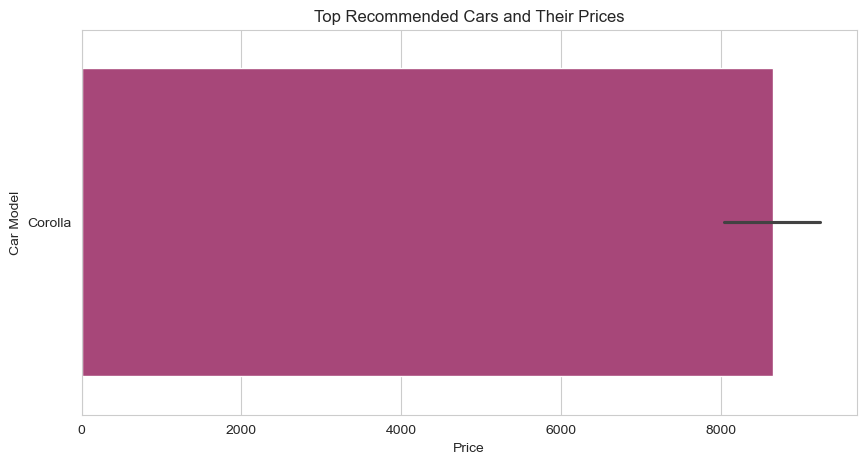

In [31]:

import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style

plt.figure(figsize=(10, 5))
sns.barplot(
    data=recommendations,
    x="Price",
    y="Model",
    hue="Model",  # Assigning hue to the same column as y
    dodge=False,  # Keeps the bars aligned properly
    palette="magma"
)
plt.legend([],[], frameon=False)  # Hides redundant legend
plt.title("Top Recommended Cars and Their Prices")
plt.xlabel("Price")
plt.ylabel("Car Model")
plt.show()

